## EDA

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import datetime
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
satellites = pd.read_csv('active_sats.csv')

In [3]:
objects = pd.read_csv('all_objects.csv')

In [4]:
# satellites.head()

In [5]:
# objects.head()

In [6]:
df_obj = objects[objects['COMMENT'].isnull()]
df_obj = df_obj.drop(columns = ['RCSVALUE', 'COMMENT'])

In [7]:
satellites = satellites.rename(columns = {'NORAD Number':'NORAD_CAT_ID', 'Longitude of GEO (degrees)': 'lon', 
                                          'Name of Satellite, Alternate Names': 'name'})

In [8]:
active_norads = list(satellites['NORAD_CAT_ID'])
len(active_norads)

2062

In [9]:
# add RCS size
df_obj['RCS_SIZE'] = df_obj['RCS_SIZE'].replace('SMALL', 0)
df_obj['RCS_SIZE'] = df_obj['RCS_SIZE'].replace('MEDIUM', 1)
df_obj['RCS_SIZE'] = df_obj['RCS_SIZE'].replace('LARGE', 2)

In [10]:
# filter date to before april
df_obj = df_obj[df_obj['LAUNCH'] < '2019-04']

In [11]:
# add eccentricity
a = df_obj['APOGEE']
p = df_obj['PERIGEE']
df_obj['ECCENTRICITY'] = (a-p)/(a+p+12740)

In [12]:
countries = {}
count = 0
for country in df_obj['COUNTRY'].unique():
    countries[country] = count
    count += 1

In [13]:
# add country 
for k, v in countries.items():
    df_obj['COUNTRY'] = df_obj['COUNTRY'].replace(k, v)

In [14]:
# add orbital velocities at apogee and perigee
G = 6.673 * 10**-11
M = 5.98 * 10**24
GM = G * M
R_earth = 6.37 * 10**6

def velocity(altitude):
    return math.sqrt(GM/(altitude*1000 + R_earth))
    
df_obj['vel_apo'] = a.apply(lambda a: velocity(a))
df_obj['vel_per'] = p.apply(lambda a: velocity(a))

In [15]:
def search_norad(num, list_norads):
    if num in list_norads:
        return 1
    else:
        return 0

In [16]:
# add object type (target)
df_obj['obj_type'] = df_obj['NORAD_CAT_ID'].apply(lambda a: search_norad(a, active_norads))

In [17]:
def get_year(launch_date):
    return str(launch_date)[0:4]

In [18]:
# add get year of launch date
df_obj['LAUNCH'] = df_obj['LAUNCH'].apply(lambda y: get_year(y))

In [19]:
df_obj = df_obj[df_obj['LAUNCH'] != 'nan']

In [20]:
# df_obj.loc[:,'LAUNCH'] = pd.to_datetime(df_obj['LAUNCH'], format='%Y-%m-%d')

In [21]:
# sns.scatterplot(x='LAUNCH', y='active',
#               hue='active', data=df_obj)

In [22]:
df_obj['obj_type'].value_counts()

0    16993
1     1986
Name: obj_type, dtype: int64

In [23]:
# def to_float(year):
#     return float(year)

In [24]:
df_obj['LAUNCH'] = df_obj['LAUNCH'].astype(float)

In [25]:
df_obj = df_obj.dropna()

In [26]:
df_obj

,OBJECT_ID,OBJECT_NAME,NORAD_CAT_ID,COUNTRY,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS_SIZE,LAUNCH,ECCENTRICITY,vel_apo,vel_per,obj_type
12,2018-084R,H-2A DEB,44620,0,95.73,98.89,592.0,516.0,0.0,2018.0,0.005488,7570.841341,7612.505953,0
13,2018-048F,CZ-2D DEB,44619,1,97.29,98.15,643.0,615.0,0.0,2018.0,0.002000,7543.262741,7558.366543,0
14,2018-034K,CZ-4C DEB,44618,1,107.31,63.47,1135.0,1069.0,0.0,2018.0,0.004416,7291.817761,7324.093418,0
15,2018-034J,CZ-4C DEB,44617,1,107.39,63.41,1134.0,1078.0,0.0,2018.0,0.003745,7292.303607,7319.666944,0
16,2018-031K,CZ-4C DEB,44616,1,97.43,97.99,640.0,632.0,0.0,2018.0,0.000571,7544.876676,7549.185572,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19855,1959-007A,VANGUARD 3,20,4,124.60,33.34,3263.0,509.0,1.0,1959.0,0.166788,6436.212497,7616.378172,0
19856,1958-002A,VANGUARD R/B,16,4,137.31,34.28,4226.0,650.0,1.0,1958.0,0.202997,6136.774705,7539.500917,0
19857,1959-001B,VANGUARD R/B,12,4,125.84,32.91,3327.0,554.0,1.0,1959.0,0.166837,6414.937901,7591.587898,0
19858,1959-001A,VANGUARD 2,11,4,121.46,32.87,2938.0,554.0,1.0,1959.0,0.146870,6547.612469,7591.587898,0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


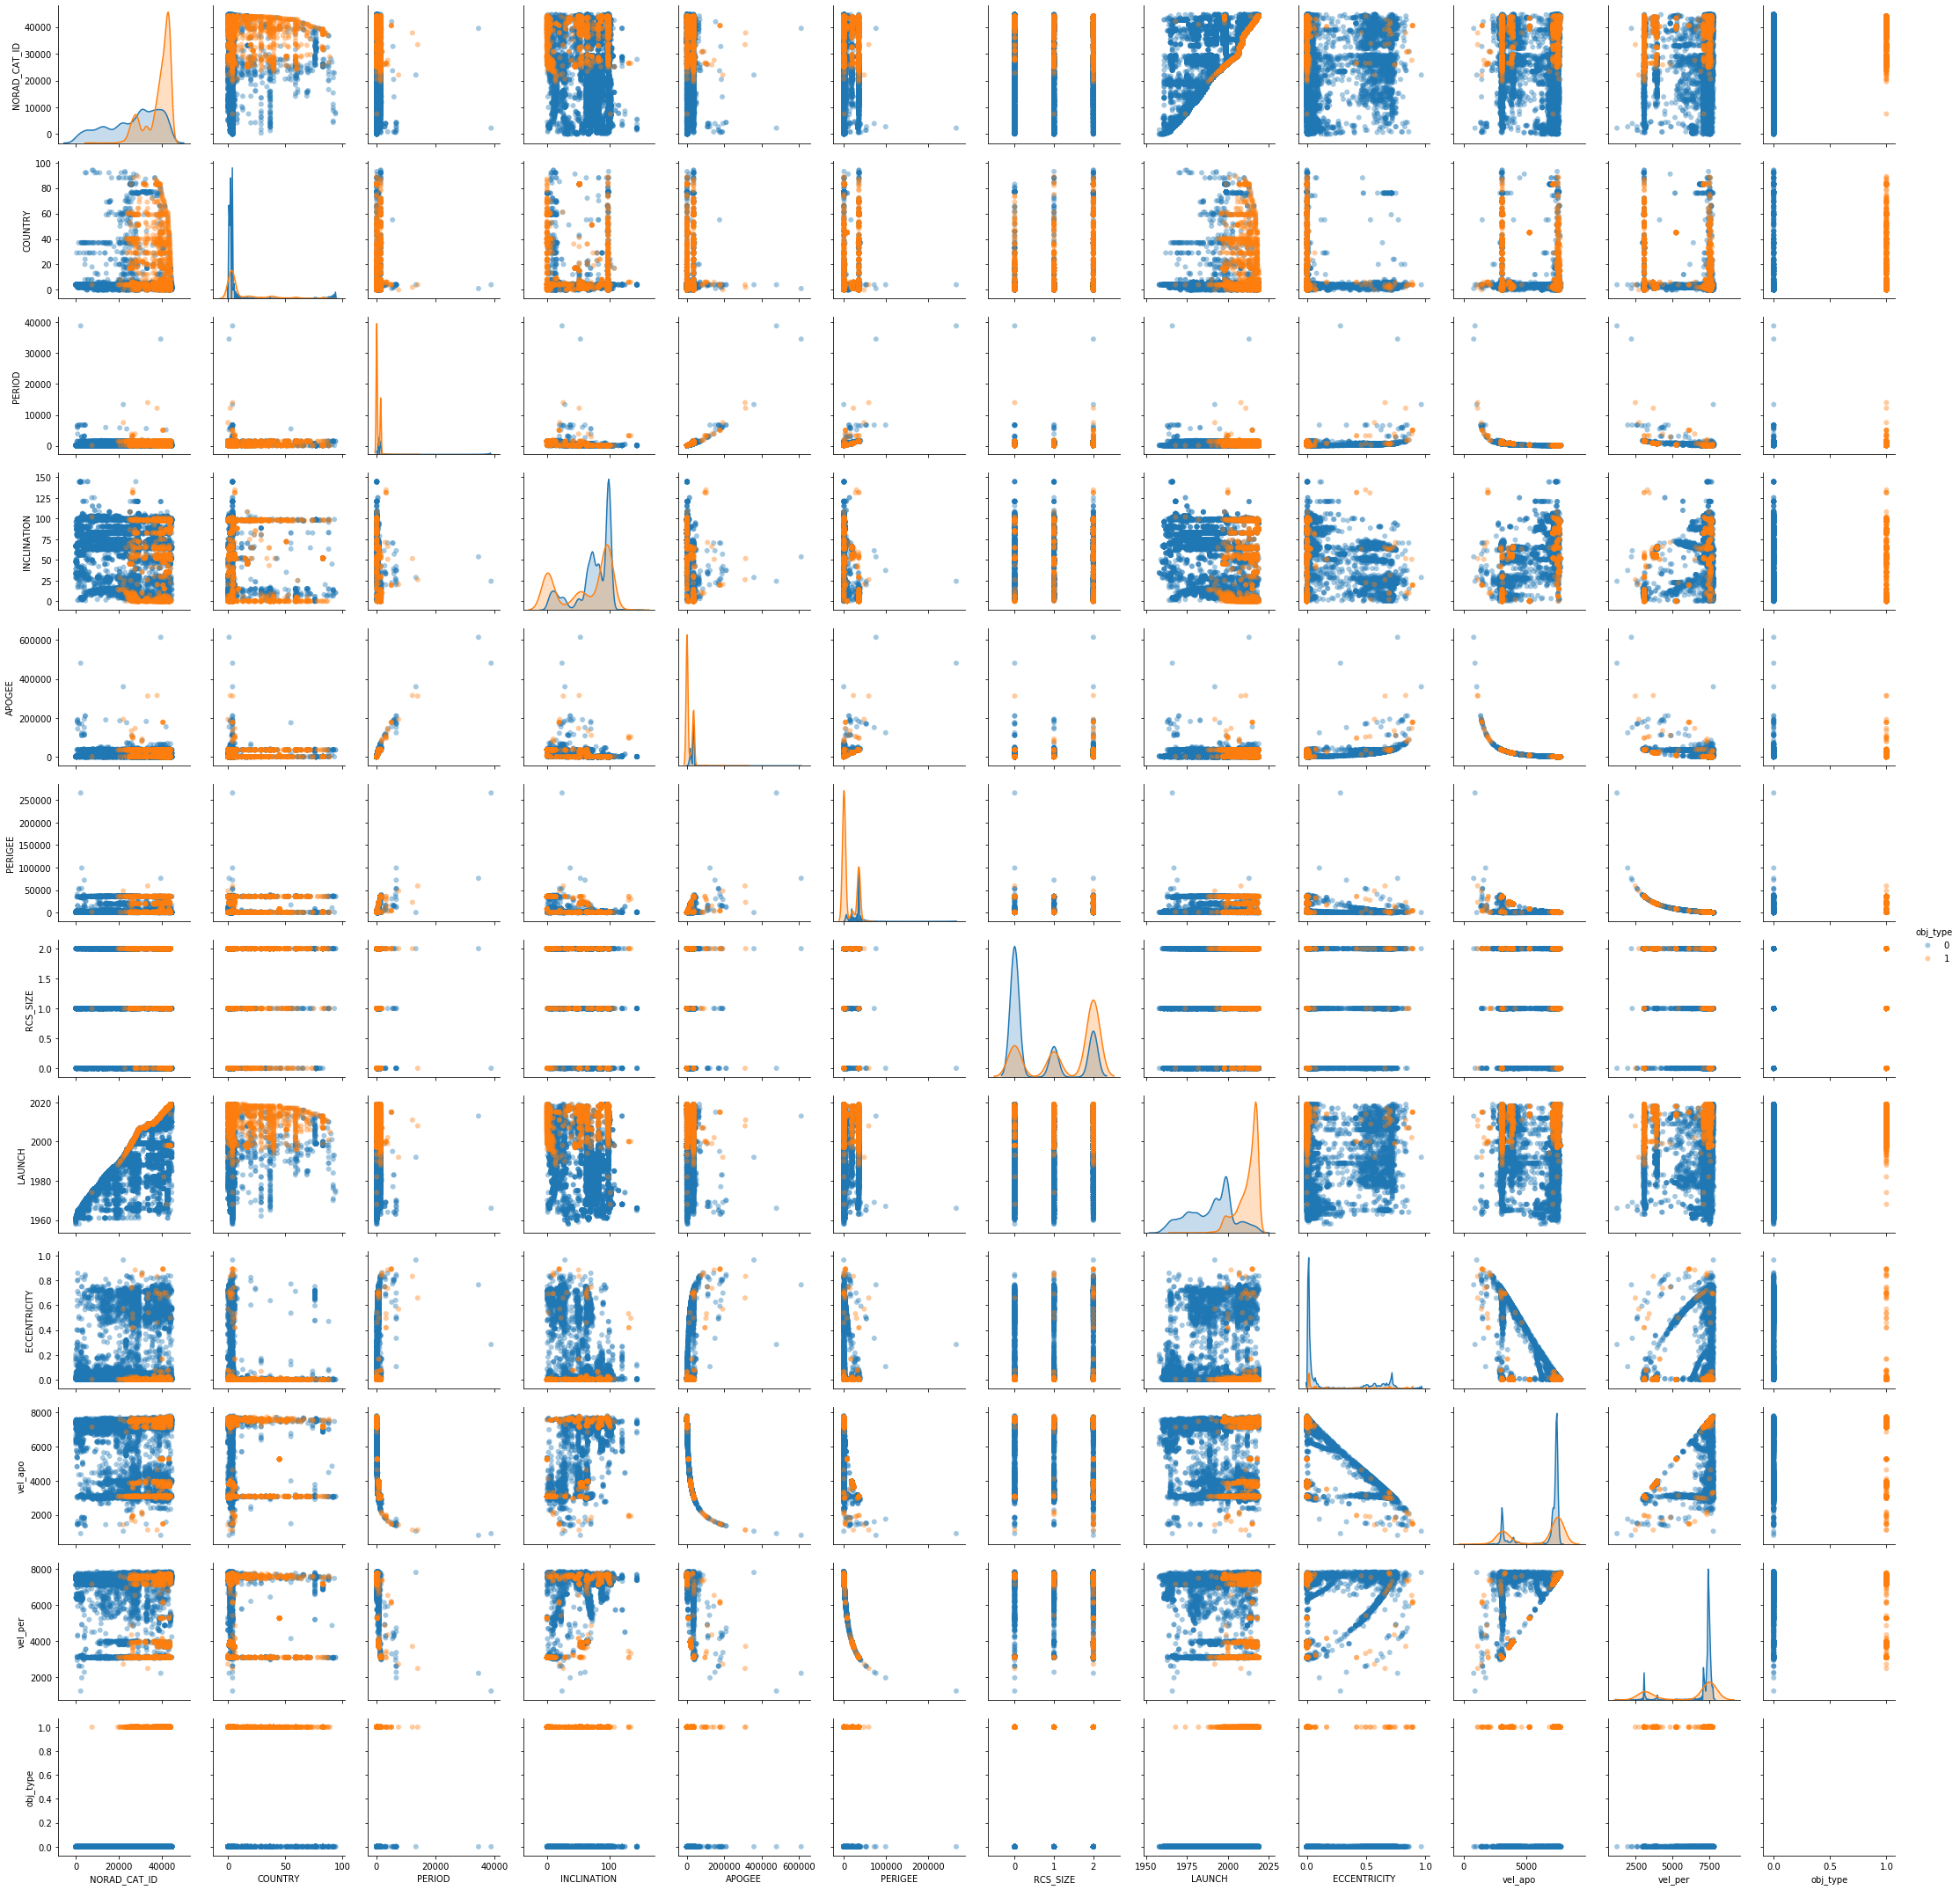

In [27]:
sns.pairplot(df_obj, hue='obj_type', plot_kws=dict(alpha=.4, edgecolor='none'))

## Modeling

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import cross_validate, cross_val_score, KFold
from sklearn.metrics import precision_recall_curve, confusion_matrix
from ipywidgets import interactive, FloatSlider
import imblearn.over_sampling
from sklearn import preprocessing

In [29]:
X = df_obj.drop(columns = ['OBJECT_ID', 'OBJECT_NAME', 'obj_type'], axis = 1)

In [30]:
y = df_obj['obj_type']

In [31]:
#Split data into 3: 60% train, 20% validation, 20% test
X_80, X_test, y_80, y_test = train_test_split(X, y, test_size=0.2, random_state=2018)
X_train, X_val, y_train, y_val = train_test_split(X_80, y_80, test_size=0.25, random_state=2019)

In [32]:
X_80.shape

(14853, 11)

In [33]:
X_train.shape

(11139, 11)

In [34]:
X_val.shape

(3714, 11)

In [35]:
X_test.shape

(3714, 11)

In [36]:
other = np.sum(df_obj['obj_type'] == 0)
active = np.sum(df_obj['obj_type'] == 1)
weight = other/active
weight

8.797889182058048

In [37]:
# setup for the ratio argument of RandomOverSampler initialization
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
multiple = n_neg / n_pos
ratio = {1 : int(n_pos * multiple), 0 : n_neg}

# randomly oversample positive samples
ROS = imblearn.over_sampling.RandomOverSampler(ratio = ratio, random_state=42)
X_os, y_os = ROS.fit_sample(X_train, y_train)

### Logistic Regression

In [38]:
lm = LogisticRegression(class_weight='balanced', solver='liblinear')
lm.fit(X_train, y_train)
y_lm = lm.predict(X_val)
lm_score = classification_report(y_val, y_lm)
print(lm_score)

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      3321
           1       0.44      0.91      0.60       393

    accuracy                           0.87      3714
   macro avg       0.72      0.89      0.76      3714
weighted avg       0.93      0.87      0.89      3714



ROC AUC score =  0.9477272013319511


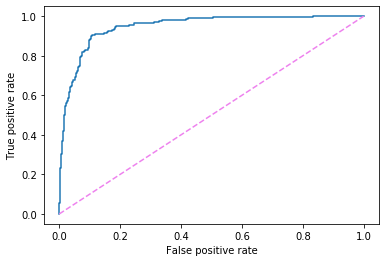

In [39]:
specificity, recall, thresholds = roc_curve(y_val, lm.predict_proba(X_val)[:,1], pos_label=1)
plt.plot(specificity, recall);
plt.plot([0, 1], [0, 1], color='violet', linestyle='--');
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
print("ROC AUC score = ", roc_auc_score(y_val, lm.predict_proba(X_val)[:,1]))

In [40]:
X_train.shape

(11139, 11)

### KNN

In [41]:
knn_scores = []

for k in range(1,21):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    score = accuracy_score(y_val, knn.predict(X_val))
    knn_scores.append((score, k))
    
print('k =', max(knn_scores)[1], 'gives the highest accuracy of {:6.4f}'.format(max(knn_scores)[0]))

k = 1 gives the highest accuracy of 0.9507


In [42]:
knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train)
y_knn = knn.predict(X_val)
knn_score = classification_report(y_val, y_knn)
print(knn_score)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3321
           1       0.75      0.74      0.75       393

    accuracy                           0.95      3714
   macro avg       0.86      0.86      0.86      3714
weighted avg       0.95      0.95      0.95      3714



ROC AUC score =  0.9475214783247634


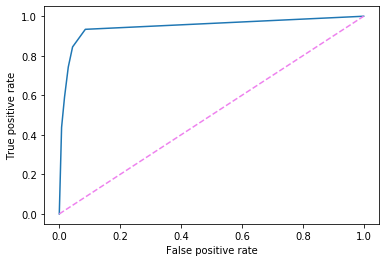

In [43]:
specificity, recall, thresholds = roc_curve(y_val, knn.predict_proba(X_val)[:,1], pos_label=1)
plt.plot(specificity, recall);
plt.plot([0, 1], [0, 1], color='violet', linestyle='--');
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
print("ROC AUC score = ", roc_auc_score(y_val, knn.predict_proba(X_val)[:,1]))

### Gaussian Naive Byaes

In [44]:
# gnb = GaussianNB()
# gnb.fit(X_train, y_train)
# y_gnb = gnb.predict(X_val)
# gnb_score = classification_report(y_val, y_gnb)
# print(gnb_score)

In [45]:
# specificity, recall, thresholds = roc_curve(y_val, gnb.predict_proba(X_val)[:,1], pos_label='1')
# plt.plot(specificity, recall);
# plt.plot([0, 1], [0, 1], color='violet', linestyle='--');
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')

### Support Vector Machine

In [46]:
# svc = SVC(probability=True, gamma='auto')
# svc.fit(X_train, y_train)
# y_svc = svc.predict(X_val)
# svc_score = classification_report(y_val, y_svc)
# print(svc_score)

In [47]:
# specificity, recall, thresholds = roc_curve(y_val, svc.predict_proba(X_val)[:,1], pos_label='1')
# plt.plot(specificity, recall);
# plt.plot([0, 1], [0, 1], color='violet', linestyle='--');
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')

### Decision Tree

In [48]:
# decision_tree = DecisionTreeClassifier()
# decision_tree.fit(X_train, y_train)
# y_dtc = decision_tree.predict(X_val)
# decision_tree_score = classification_report(y_val, y_dtc)
# print(decision_tree_score)

In [49]:
# specificity, recall, thresholds = roc_curve(y_val, decision_tree.predict_proba(X_val)[:,1], pos_label='1')
# plt.plot(specificity, recall);
# plt.plot([0, 1], [0, 1], color='violet', linestyle='--');
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')

### Random Forest

In [50]:
random_forest = RandomForestClassifier(class_weight='balanced', n_estimators=10)
random_forest.fit(X_train, y_train)
y_rfc = random_forest.predict(X_val)
random_forest_score = classification_report(y_val, y_rfc)
print(random_forest_score)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3321
           1       0.90      0.81      0.85       393

    accuracy                           0.97      3714
   macro avg       0.94      0.90      0.92      3714
weighted avg       0.97      0.97      0.97      3714



ROC AUC score =  0.9825162260669822


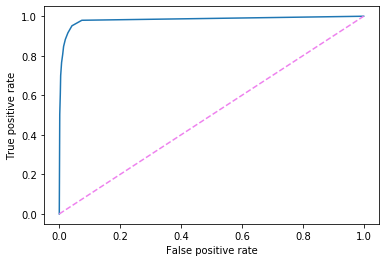

In [51]:
specificity, recall, thresholds = roc_curve(y_val, random_forest.predict_proba(X_val)[:,1], pos_label=1)
plt.plot(specificity, recall);
plt.plot([0, 1], [0, 1], color='violet', linestyle='--');
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
print("ROC AUC score = ", roc_auc_score(y_val, random_forest.predict_proba(X_val)[:,1]))

### XGBoost

In [52]:
gbm = xgb.XGBClassifier( 
                       n_estimators=30000, #arbitrary large number
                       max_depth=5,
                       objective='binary:logistic',
                       scale_pos_weight=weight,
                       learning_rate=1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.8
                      )

eval_set=[(X_train,y_train), (X_val,y_val)] #tracking train/validation error as we go

gbm.fit( 
        X_train, y_train, 
        eval_set=eval_set,
        eval_metric='error',
        early_stopping_rounds=20,
        verbose=False #does not give output log as below
       )

y_xgb = gbm.predict(X_val)
xgboost_score = classification_report(y_val, y_xgb)
print(xgboost_score)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3321
           1       0.87      0.90      0.88       393

    accuracy                           0.97      3714
   macro avg       0.93      0.94      0.93      3714
weighted avg       0.98      0.97      0.97      3714



ROC AUC score =  0.9908072080438078


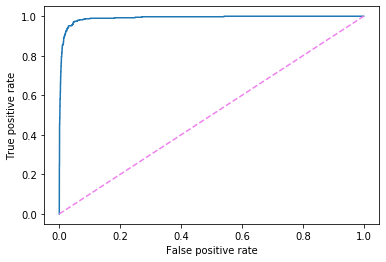

In [53]:
specificity, recall, thresholds = roc_curve(y_val, gbm.predict_proba(X_val)[:,1], pos_label=1)
plt.plot(specificity, recall);
plt.plot([0, 1], [0, 1], color='violet', linestyle='--');
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
print("ROC AUC score = ", roc_auc_score(y_val, gbm.predict_proba(X_val)[:,1]))

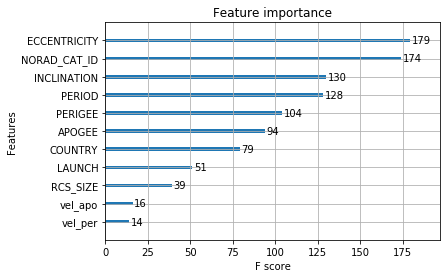

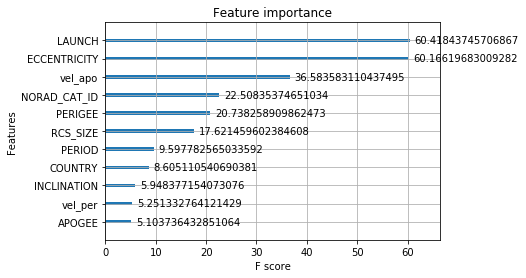

In [54]:
xgb.plot_importance(gbm)
xgb.plot_importance(gbm, importance_type='gain')

### Confusion Matrices

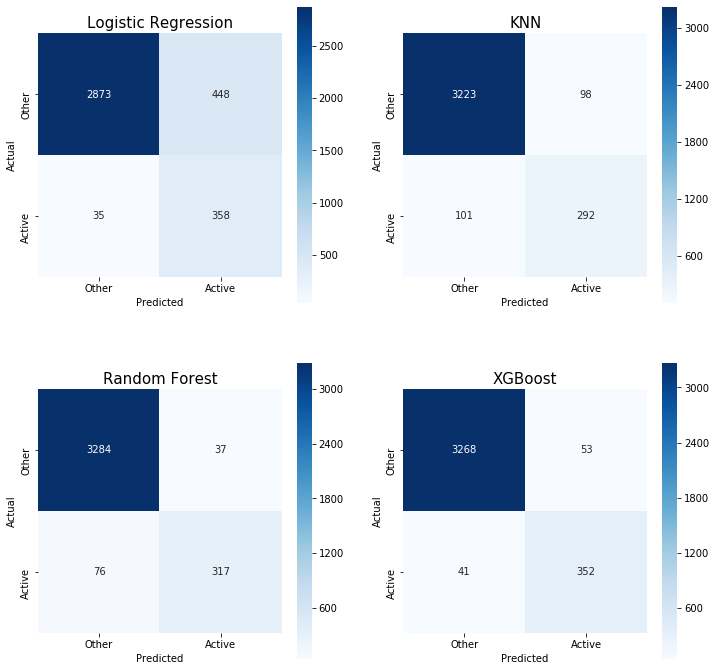

In [55]:
models = zip(range(1,5),
             ['Logistic Regression', 'KNN', 'Random Forest', 'XGBoost'],
             [y_lm, y_knn, y_rfc, y_xgb])
plt.figure(figsize=(12,12))

for ind, name, pred in models:
    plt.subplot(2, 2, ind)
    cm = confusion_matrix(y_val, pred)
    ax = sns.heatmap(cm,
                cmap=plt.cm.Blues,
                annot=True,
                square=True,
                xticklabels=['Other', 'Active'],
                yticklabels=['Other', 'Active'],
                fmt='g')
    ax.set_ylim(2, 0)
    plt.title(name, size=15);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

### Adjust Threshold with Slider

In [56]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = model.predict_proba(X_val)[:, 1] >= threshold
    #y_predict = [str(int(i)) for i in pred]
    cm = confusion_matrix(y_val, y_predict)
    plt.figure(dpi=80)
    ax = sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['other', 'actual'],
           yticklabels=['other', 'actual']);
    ax.set_ylim(2, 0)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

In [57]:
interactive(lambda threshold: make_confusion_matrix(gbm, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

### Threshold Adustment to Optimize F1

In [58]:
models = zip(range(1,5),
                 ['Logistic Regression', 'KNN', 'Random Forest', 'XGBoost'],
                 [lm, knn, random_forest, gbm])

def f1_plot(models):    
    plt.figure(figsize=(12,12))
    
    for ind, name, model in models:
        model_val_probs = model.predict_proba(X_val)[:,1] # positive class probs 
        f1_scores = []
        thresh_ps = np.linspace(0.01, 0.99, 1000)
    
        for p in thresh_ps:
            model_val_labels = model_val_probs >= p
            f1_scores.append(f1_score(y_val, model_val_labels, labels=np.unique(y_val)))
       
        plt.subplot(2, 2, ind)
        plt.plot(thresh_ps, f1_scores)
        plt.title(name, size=15)
        plt.xlabel('P threshold')
        plt.ylabel('F1 score')

        best_f1_score = np.max(f1_scores) 
        best_thresh_p = thresh_ps[np.argmax(f1_scores)]
        print(name, 'Model best F1 score %.3f at prob decision threshold >= %.3f' 
        % (best_f1_score, best_thresh_p))

# print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
#       % (best_f1_score, best_thresh_p))

Logistic Regression Model best F1 score 0.666 at prob decision threshold >= 0.629
KNN Model best F1 score 0.763 at prob decision threshold >= 0.200
Random Forest Model best F1 score 0.862 at prob decision threshold >= 0.400
XGBoost Model best F1 score 0.885 at prob decision threshold >= 0.553


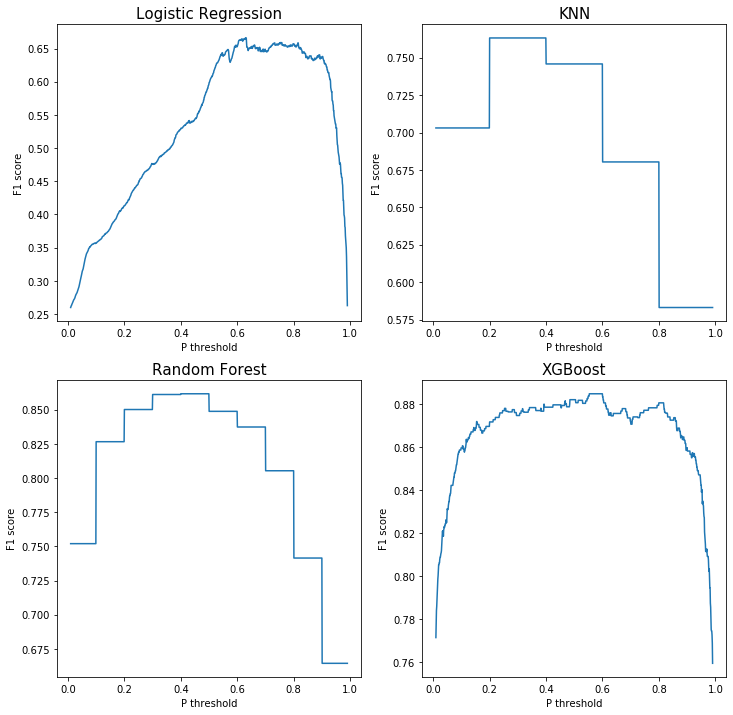

In [59]:
f1_plot(models)

### Cross Validation

In [60]:
# xgb_probs = gbm.predict_proba(X_val)[:,1]
# xgb_labels = xgb_probs >= 0.397

In [61]:
X_, y_ = np.array(X_80), np.array(y_80)

kf = KFold(n_splits=10, random_state=42)

lm_accuracy = []
lm_precision = []
lm_recall = []
lm_f1 = []

knn_accuracy = []
knn_precision = []
knn_recall = []
knn_f1 = []

rf_accuracy = []
rf_precision = []
rf_recall = []
rf_f1 = []

xgb_accuracy = []
xgb_precision = []
xgb_recall = []
xgb_f1 = []

for train_ind, val_ind in kf.split(X_,y_):
    
    X_train, y_train = X_[train_ind], y_[train_ind]
    X_val, y_val = X_[val_ind], y_[val_ind]
    
    # logistic regression
    lm.fit(X_train, y_train)
    lm_probs = lm.predict_proba(X_val)[:,1]
    lm_labels = lm_probs >= 0.629
    
    lm_accuracy.append(accuracy_score(y_val, lm_labels))
    lm_precision.append(precision_score(y_val, lm_labels)) 
    lm_recall.append(recall_score(y_val, lm_labels))
    lm_f1.append(f1_score(y_val, lm_labels))
    
    # knn
    knn.fit(X_train, y_train)
    knn_probs = knn.predict_proba(X_val)[:,1]
    knn_labels = knn_probs >= 0.3
    
    knn_accuracy.append(accuracy_score(y_val, knn_labels))
    knn_precision.append(precision_score(y_val, knn_labels)) 
    knn_recall.append(recall_score(y_val, knn_labels))
    knn_f1.append(f1_score(y_val, knn_labels))
    
    # random forest
    random_forest.fit(X_train, y_train)
    rf_probs = random_forest.predict_proba(X_val)[:,1]
    rf_labels = rf_probs >= 0.5
    
    rf_accuracy.append(accuracy_score(y_val, rf_labels))
    rf_precision.append(precision_score(y_val, rf_labels)) 
    rf_recall.append(recall_score(y_val, rf_labels))
    rf_f1.append(f1_score(y_val, rf_labels))
    
    # xgboost
    eval_set=[(X_train,y_train), (X_val,y_val)] #tracking train/validation error as we go

    gbm.fit( 
            X_train, y_train, 
            eval_set=eval_set,
            eval_metric='error',
            early_stopping_rounds=20,
            verbose=False #does not give output log as below
           )
                        
    xgb_probs = gbm.predict_proba(X_val)[:,1]
    xgb_labels = xgb_probs > 0.5
    
    xgb_accuracy.append(accuracy_score(y_val, xgb_labels))
    xgb_precision.append(precision_score(y_val, xgb_labels)) 
    xgb_recall.append(recall_score(y_val, xgb_labels))
    xgb_f1.append(f1_score(y_val, xgb_labels))

print('Logistic Regression cross-val metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n' %
        (np.mean(lm_accuracy), np.mean(lm_precision), np.mean(lm_recall), np.mean(lm_f1)
        )
     )

print('KNN cross-val metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n' %
        (np.mean(knn_accuracy), np.mean(knn_precision), np.mean(knn_recall), np.mean(knn_f1)
        )
     )

print('Random Forest cross-val metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n' %
        (np.mean(rf_accuracy), np.mean(rf_precision), np.mean(rf_recall), np.mean(rf_f1)
        )
     )

print('XGB cross-val metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n' %
        (np.mean(xgb_accuracy), np.mean(xgb_precision), np.mean(xgb_recall), np.mean(xgb_f1)
        )
     )

Logistic Regression cross-val metrics: 
 Accuracy: 0.9148 
 Precision: 0.5627 
 Recall: 0.8022 
 F1: 0.6609 

KNN cross-val metrics: 
 Accuracy: 0.9480 
 Precision: 0.7051 
 Recall: 0.8551 
 F1: 0.7725 

Random Forest cross-val metrics: 
 Accuracy: 0.9708 
 Precision: 0.8533 
 Recall: 0.8656 
 F1: 0.8590 

XGB cross-val metrics: 
 Accuracy: 0.9720 
 Precision: 0.8264 
 Recall: 0.9227 
 F1: 0.8718 



### Predicting on Test Set

Random Forest test metrics: 
 Accuracy: 0.9711 
 Precision: 0.8538 
 Recall: 0.8663 
 F1: 0.8596 
 AUC: 0.9289 

XGB test metrics: 
 Accuracy: 0.9722 
 Precision: 0.8270 
 Recall: 0.9212 
 F1: 0.8715 
 AUC: 0.9439 



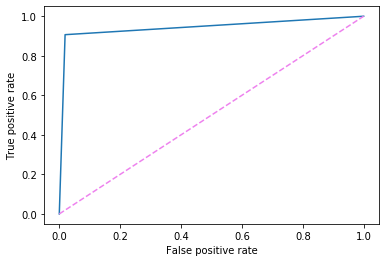

In [62]:
random_forest.fit(X_80, y_80)
rf_probs = random_forest.predict_proba(X_test)[:,1]
rf_labels = rf_probs >= 0.5

rf_accuracy.append(accuracy_score(y_test, rf_labels))
rf_precision.append(precision_score(y_test, rf_labels)) 
rf_recall.append(recall_score(y_test, rf_labels))
rf_f1.append(f1_score(y_test, rf_labels))


eval_set=[(X_80, y_80), (X_test, y_test)]

gbm.fit( 
        X_80, y_80, 
        eval_set=eval_set,
        eval_metric='error',
        early_stopping_rounds=20,
        verbose=False #does not give output log as below
       )

xgb_probs = gbm.predict_proba(X_test)[:,1]
xgb_labels = xgb_probs > 0.5

xgb_accuracy.append(accuracy_score(y_test, xgb_labels))
xgb_precision.append(precision_score(y_test, xgb_labels)) 
xgb_recall.append(recall_score(y_test, xgb_labels))
xgb_f1.append(f1_score(y_test, xgb_labels))

rf_auc = roc_auc_score(y_test, rf_labels)
xgb_auc = roc_auc_score(y_test, xgb_labels)

print('Random Forest test metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n AUC: %.4f \n' %
        (np.mean(rf_accuracy), np.mean(rf_precision), np.mean(rf_recall), np.mean(rf_f1), rf_auc
        )
     )

print('XGB test metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n AUC: %.4f \n' %
        (np.mean(xgb_accuracy), np.mean(xgb_precision), np.mean(xgb_recall), np.mean(xgb_f1), xgb_auc
        )
     )

specificity, recall, thresholds = roc_curve(y_test, xgb_labels, pos_label=1)
plt.plot(specificity, recall);
plt.plot([0, 1], [0, 1], color='violet', linestyle='--');
plt.xlabel('False positive rate');
plt.ylabel('True positive rate');

### Converting Data to JSON to Map

In [63]:
map_sats = X_test
map_sats['predict_probs'] = xgb_probs * 100
map_sats['predict'] = xgb_labels
map_sats['actual'] = y_test

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value

In [64]:
map_sats = map_sats[map_sats['actual'] == 1]

In [65]:
map_sats = map_sats.drop(columns = 'actual')

In [66]:
def format(percent):
    return '{:6.2f}'.format(percent)

map_sats['predict_probs'] = map_sats['predict_probs'].apply(lambda p: format(p))

In [67]:
map_sats

,NORAD_CAT_ID,COUNTRY,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS_SIZE,LAUNCH,ECCENTRICITY,vel_apo,vel_per,predict_probs,predict
3424,40613,53,1436.07,0.01,35798.0,35774.0,2.0,2015.0,0.000285,3076.236018,3077.111815,100.00,True
5469,37849,4,101.44,98.71,827.0,826.0,2.0,2011.0,0.000069,7446.212108,7446.729475,99.98,True
4601,39034,8,1436.10,0.08,35805.0,35768.0,2.0,2012.0,0.000439,3075.980718,3077.330881,100.00,True
1598,42767,5,94.78,97.46,514.0,502.0,2.0,2017.0,0.000872,7613.611698,7620.256306,94.02,True
1521,42854,4,93.53,96.92,454.0,440.0,0.0,2017.0,0.001027,7647.009775,7654.866102,99.99,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,43137,4,94.51,97.48,501.0,489.0,0.0,2018.0,0.000874,7620.810809,7627.474300,99.79,True
10751,29499,33,101.30,98.56,821.0,820.0,2.0,2006.0,0.000070,7449.317931,7449.835947,94.09,True
3875,40025,65,96.71,97.90,610.0,592.0,0.0,2014.0,0.001291,7561.073210,7570.841341,0.77,False
2358,41926,4,100.40,86.40,779.0,776.0,2.0,2017.0,0.000210,7471.168062,7472.736153,100.00,True


In [68]:
map_sats[map_sats['predict'] == 1]

,NORAD_CAT_ID,COUNTRY,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS_SIZE,LAUNCH,ECCENTRICITY,vel_apo,vel_per,predict_probs,predict
3424,40613,53,1436.07,0.01,35798.0,35774.0,2.0,2015.0,0.000285,3076.236018,3077.111815,100.00,True
5469,37849,4,101.44,98.71,827.0,826.0,2.0,2011.0,0.000069,7446.212108,7446.729475,99.98,True
4601,39034,8,1436.10,0.08,35805.0,35768.0,2.0,2012.0,0.000439,3075.980718,3077.330881,100.00,True
1598,42767,5,94.78,97.46,514.0,502.0,2.0,2017.0,0.000872,7613.611698,7620.256306,94.02,True
1521,42854,4,93.53,96.92,454.0,440.0,0.0,2017.0,0.001027,7647.009775,7654.866102,99.99,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4274,39533,4,718.01,53.86,20296.0,20070.0,2.0,2014.0,0.004256,3868.407504,3884.905231,96.95,True
1282,43137,4,94.51,97.48,501.0,489.0,0.0,2018.0,0.000874,7620.810809,7627.474300,99.79,True
10751,29499,33,101.30,98.56,821.0,820.0,2.0,2006.0,0.000070,7449.317931,7449.835947,94.09,True
2358,41926,4,100.40,86.40,779.0,776.0,2.0,2017.0,0.000210,7471.168062,7472.736153,100.00,True


In [69]:
active = satellites[['name', 'NORAD_CAT_ID', 'lon']]
active

,name,NORAD_CAT_ID,lon
0,3Cat-1,43728,0.0
1,Aalto-1,42775,0.0
2,AAUSat-4,41460,0.0
3,"ABS-2 (Koreasat-8, ST-3)",39508,75.0
4,ABS-2A,41588,-75.0
...,...,...,...
2057,Zhuhai-1-02 (OVS-1B),52759,0.0
2058,Zhuhai-1-03 (OVS-2A),43440,0.0
2059,Ziyuan 1-02C,38038,0.0
2060,Ziyuan 3 (ZY-3),38046,0.0


In [70]:
map_sats = map_sats.merge(active)

In [71]:
map_sats = map_sats.drop_duplicates(subset='NORAD_CAT_ID')

In [72]:
map_sats['lat'] = np.random.uniform(-180, 180, len(map_sats))

In [73]:
# map_sats = map_sats.drop(columns = 'name')

In [74]:
# def to_int(predict):
#     if predict == True:
#         return 1
#     elif predict == False:
#         return 0

In [75]:
# map_sats['predict'] = map_sats['predict'].apply(lambda p :to_int(p))

In [76]:
train_dat = X_80
train_dat['actual'] = y_80
train_dat = train_dat[train_dat['actual'] == 1]
train_dat['predict_probs'] = 0
train_dat['predict'] = 2
train_dat = train_dat.merge(active)
train_dat= train_dat.drop_duplicates(subset='NORAD_CAT_ID')
train_dat['lat'] = np.random.uniform(-180, 180, len(train_dat))
train_dat = train_dat.drop(columns = 'actual')
train_dat

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,NORAD_CAT_ID,COUNTRY,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS_SIZE,LAUNCH,ECCENTRICITY,vel_apo,vel_per,predict_probs,predict,name,lon,lat
0,43831,22,95.49,97.60,551.0,534.0,2.0,2018.0,0.001230,7593.233058,7602.575873,0,2,Saudisat-5A,0.0,-63.378833
1,26985,4,1429.41,0.13,35679.0,35632.0,2.0,2001.0,0.000559,3080.585866,3082.308963,0,2,DirecTV-4S,-101.2,142.600221
2,41977,4,94.39,97.40,495.0,482.0,0.0,2017.0,0.000948,7624.140370,7631.369417,0,2,Dove 3p-58 (0 Flock 3P-58 1009),0.0,-158.141815
3,40286,1,98.51,98.07,696.0,679.0,2.0,2014.0,0.001204,7514.919588,7523.975958,0,2,Shijian 11-08 (SJ-11-08),0.0,149.393695
4,41179,17,98.98,47.00,713.0,707.0,1.0,2015.0,0.000424,7505.895843,7509.076981,0,2,ORBCOMM OG2 FM-114,0.0,144.829037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,40483,4,5035.01,19.44,177536.0,4329.0,2.0,2015.0,0.890044,1473.035472,6107.163692,0,2,MMS-2 (Magnetospheric Multiscale Mission),0.0,102.927866
1546,36798,48,98.19,98.01,673.0,672.0,1.0,2010.0,0.000071,7527.180150,7527.714580,0,2,Alsat-2A (Algeria Satellite 2A),0.0,19.592089
1547,43672,0,97.02,97.85,617.0,615.0,2.0,2018.0,0.000143,7557.284690,7558.366543,0,2,GOSAT-2 (Greenhouse gases Observing Satellite-...,0.0,29.845939
1548,42841,4,96.50,97.55,600.0,582.0,0.0,2017.0,0.001293,7566.495278,7576.284466,0,2,Lemur-2-PeterG (Lemur 2F48),0.0,138.165942


In [77]:
map_sats = pd.concat([map_sats, train_dat])

In [78]:
map_sats

,NORAD_CAT_ID,COUNTRY,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS_SIZE,LAUNCH,ECCENTRICITY,vel_apo,vel_per,predict_probs,predict,name,lon,lat
0,40613,53,1436.07,0.01,35798.0,35774.0,2.0,2015.0,0.000285,3076.236018,3077.111815,100.00,1,Thor-7,-1.0,176.178937
1,37849,4,101.44,98.71,827.0,826.0,2.0,2011.0,0.000069,7446.212108,7446.729475,99.98,1,NPP (National Polar-orbiting Operational Envir...,0.0,-133.392929
2,39034,8,1436.10,0.08,35805.0,35768.0,2.0,2012.0,0.000439,3075.980718,3077.330881,100.00,1,Skynet 5D,25.0,-51.061445
3,42767,5,94.78,97.46,514.0,502.0,2.0,2017.0,0.000872,7613.611698,7620.256306,94.02,1,CartoSat 2E,0.0,-32.552922
4,42854,4,93.53,96.92,454.0,440.0,0.0,2017.0,0.001027,7647.009775,7654.866102,99.99,1,Dove 2k-47 (0 Flock 2K-47 1043),0.0,55.484480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,40483,4,5035.01,19.44,177536.0,4329.0,2.0,2015.0,0.890044,1473.035472,6107.163692,0,2,MMS-2 (Magnetospheric Multiscale Mission),0.0,102.927866
1546,36798,48,98.19,98.01,673.0,672.0,1.0,2010.0,0.000071,7527.180150,7527.714580,0,2,Alsat-2A (Algeria Satellite 2A),0.0,19.592089
1547,43672,0,97.02,97.85,617.0,615.0,2.0,2018.0,0.000143,7557.284690,7558.366543,0,2,GOSAT-2 (Greenhouse gases Observing Satellite-...,0.0,29.845939
1548,42841,4,96.50,97.55,600.0,582.0,0.0,2017.0,0.001293,7566.495278,7576.284466,0,2,Lemur-2-PeterG (Lemur 2F48),0.0,138.165942


In [79]:
def makedict(row):
    d = {}
    d["type"] = "Point"
    d["coordinates"] = [row['lon'], row['lat']]
    d["predict"] = row['predict']
    return d

In [80]:
d = {"type": "Topology","objects": 
    {"plane1": map_sats.apply(makedict,axis=1).tolist()}}

In [81]:
import json

In [82]:
with open('points.json', 'w') as json_file:
    json.dump(d, json_file)

In [83]:
d

{'type': 'Topology',
 'objects': {'plane1': [{'type': 'Point',
    'coordinates': [-1.0, 176.1789370405362],
    'predict': 1},
   {'type': 'Point', 'coordinates': [0.0, -133.3929292759417], 'predict': 1},
   {'type': 'Point', 'coordinates': [25.0, -51.06144501925428], 'predict': 1},
   {'type': 'Point', 'coordinates': [0.0, -32.55292169084095], 'predict': 1},
   {'type': 'Point', 'coordinates': [0.0, 55.48447970296641], 'predict': 1},
   {'type': 'Point', 'coordinates': [0.0, -12.401166505485179], 'predict': 0},
   {'type': 'Point', 'coordinates': [62.7, 18.489790730369208], 'predict': 1},
   {'type': 'Point', 'coordinates': [0.0, 79.2912482547311], 'predict': 1},
   {'type': 'Point', 'coordinates': [0.0, 62.82243598530971], 'predict': 1},
   {'type': 'Point', 'coordinates': [0.0, -143.26768155222155], 'predict': 1},
   {'type': 'Point',
    'coordinates': [-11.0, -154.12376499757008],
    'predict': 1},
   {'type': 'Point', 'coordinates': [0.0, -96.10673290319157], 'predict': 1},
   